In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
covid_data = pd.read_csv('covid_daily_roll.csv')
covid_data['date'] = pd.to_datetime(covid_data['date'])
policy_data = pd.read_csv("data/policies/eng-scot.csv", parse_dates=True)
policy_data['Date'] = pd.to_datetime(policy_data['Date'], format='%Y%m%d')

In [3]:
# Regression 1: Impact of reducing mask mandate
offset = 14
reg1_startdate = pd.to_datetime('2022-01-14')
#reg1_startdate = pd.to_datetime('2020-01-21')
data_reg1_y = covid_data[covid_data['date'] > reg1_startdate]
data_reg1_X = policy_data[policy_data['RegionName'] == 'England']
data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
data_reg1_X['nomask'] = data_reg1_X['nomask'].shift(offset)
#data_reg1_X['Date'] = pd.to_datetime(data_reg1_X['Date'], format='%Y%m%d')
data_reg1_X = data_reg1_X[data_reg1_X['Date'] > reg1_startdate]
#data_reg1_X = london_covid[london_covid['date'] > pd.to_datetime('2021-01-01')]['daily_cases']
reg1_intdate = data_reg1_X[data_reg1_X['nomask'] == 1]['Date'].sort_values().iloc[0]
reg1_intdate_offset = reg1_intdate + datetime.timedelta(days=offset)
print(reg1_intdate)
data_reg1_X = data_reg1_X[data_reg1_X['Date'] < reg1_startdate + 2 * (reg1_intdate_offset-reg1_startdate)]
data_reg1_y = data_reg1_y[data_reg1_y['date'] < reg1_startdate + 2 * (reg1_intdate_offset-reg1_startdate)]
data_reg1_X['T'] = (data_reg1_X['Date'] - reg1_intdate).dt.days - offset
data_reg1 = pd.merge(data_reg1_y, data_reg1_X, left_on='date', right_on='Date')
#reg1 = smf.glm(formula='slope ~ T*nomask', data=data_reg1)#, family=sm.families.Poisson())
reg1 = smf.glm(formula='slope_cases_roll_avg ~ T*nomask', data=data_reg1)#, family=sm.families.Poisson())
res_reg1 = reg1.fit()
print(res_reg1.summary())

2022-02-10 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   75
Model:                              GLM   Df Residuals:                       71
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          42303.
Method:                            IRLS   Log-Likelihood:                -503.84
Date:                  Thu, 07 Apr 2022   Deviance:                   3.0035e+06
Time:                          12:01:15   Pearson chi2:                 3.00e+06
No. Iterations:                       3   Pseudo R-squ. (CS):             0.4080
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/3669683766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X.loc[data_reg1_X['H6_Flag'].isna(), 'nomask'] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/3669683766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg1_X['nomask'] = data_reg1_X['nomask'].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/3669683766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

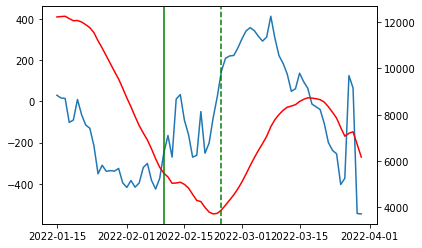

In [32]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(data_reg1_y.set_index('date')['slope'])
ax1.plot(data_reg1_y.set_index('date')['slope_cases_roll_avg'])
ax2.plot(data_reg1_y.set_index('date')['cases_roll_avg'], color='red')
#data_reg1_y.set_index('date')['slope'].plot()
#data_reg1_y.set_index('date')['slope'].plot()
plt.axvline(x=reg1_intdate, color='green')
plt.axvline(x=reg1_intdate_offset, color='green', linestyle='--')
#data_reg1_X.plot()
#data_reg1_X.set_index('Date')['nomask'].plot()

<AxesSubplot:xlabel='Date'>

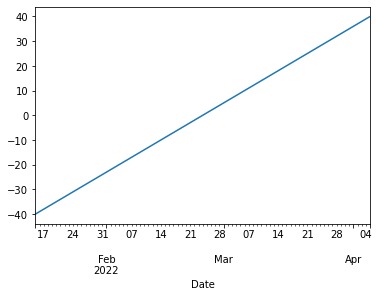

In [5]:
data_reg1_X.set_index('Date')['T'].plot()

In [6]:
# Regression 2: Impact of reducing mask mandate
offset = 3
reg2_startdate = pd.to_datetime('2022-02-24')
data_reg2_y = covid_data[covid_data['date'] > reg2_startdate]
data_reg2_X = policy_data[policy_data['RegionName'] == 'England']
data_reg2_X.loc[data_reg2_X['C1_Flag'].isna(), 'schoolopen'] = 1
data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].fillna(0)
data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].shift(offset)
data_reg2_X['Date'] = pd.to_datetime(data_reg2_X['Date'], format='%Y%m%d')
data_reg2_X = data_reg2_X[data_reg2_X['Date'] > reg2_startdate]
#data_reg2_X = london_covid[london_covid['date'] > pd.to_datetime('2021-01-01')]['daily_cases']
reg2_intdate = data_reg2_X[data_reg2_X['schoolopen'] == 1]['Date'].sort_values().iloc[0]
reg2_intdate_offset = reg2_intdate + datetime.timedelta(days=offset)
data_reg2_X = data_reg2_X[data_reg2_X['Date'] < reg2_startdate + 2 * (reg2_intdate_offset-reg2_startdate)]
data_reg2_y = data_reg2_y[data_reg2_y['date'] < reg2_startdate + 2 * (reg2_intdate_offset-reg2_startdate)]
data_reg2_X['T'] = (data_reg2_X['Date'] - reg2_intdate).dt.days - offset
data_reg2 = pd.merge(data_reg2_y, data_reg2_X, left_on='date', right_on='Date')
reg2 = smf.glm(formula='slope_cases_roll_avg ~ T*schoolopen', data=data_reg2)#, family=sm.families.Poisson())
res_reg2 = reg2.fit()
print(reg2_intdate)
print(reg2_intdate_offset)
print(res_reg2.summary())

2022-02-27 00:00:00
2022-03-02 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   11
Model:                              GLM   Df Residuals:                        7
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          1556.7
Method:                            IRLS   Log-Likelihood:                -53.549
Date:                  Thu, 07 Apr 2022   Deviance:                       10897.
Time:                          12:01:16   Pearson chi2:                 1.09e+04
No. Iterations:                       3   Pseudo R-squ. (CS):             0.6666
Covariance Type:              nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/2448469057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg2_X.loc[data_reg2_X['C1_Flag'].isna(), 'schoolopen'] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/2448469057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg2_X['schoolopen'] = data_reg2_X['schoolopen'].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/2448469057.py:8: SettingWithCopyWarning: 
A value is trying to

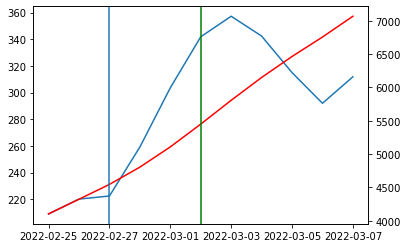

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(data_reg2_y.set_index('date')['slope'])
ax1.plot(data_reg2_y.set_index('date')['slope_cases_roll_avg'])
ax2.plot(data_reg2_y.set_index('date')['cases_roll_avg'], color='red')
plt.axvline(x=reg2_intdate)
plt.axvline(x=reg2_intdate_offset, color='green')
#data_reg2_y.set_index('date')['slope_cases_roll_avg'].plot()
#data_reg2_y.set_index('date')['cases_roll_avg'].plot()
#data_reg1_X.plot()
#data_reg1_X.set_index('Date')['T'].plot()
#data_reg2_X.set_index('Date')['schoolopen'].plot()

In [8]:
data_reg2_y.set_index('date')[['slope_cases_roll_avg', 'cases_roll_avg']]

,slope_cases_roll_avg,cases_roll_avg
date,,
2022-03-07,311.857143,7067.571429
2022-03-06,292.000000,6755.714286
2022-03-05,315.000000,6463.714286
2022-03-04,342.428571,6148.714286
2022-03-03,357.285714,5806.285714
2022-03-02,341.857143,5449.000000
2022-03-01,303.571429,5107.142857
2022-02-28,259.142857,4803.571429
2022-02-27,222.428571,4544.428571


In [9]:
# Regression 5: Multiple policies
reg5_startdate = pd.to_datetime('2022-01-17')
reg5_enddate = pd.to_datetime('2022-03-21')

data_reg5_X = policy_data[policy_data['RegionName'] == 'England']
data_reg5_X = data_reg5_X[data_reg5_X['Date'] > reg5_startdate]

data_reg5_X.loc[data_reg5_X['H6_Flag'].isna(), 'nomask'] = 1
data_reg5_X['nomask'] = data_reg5_X['nomask'].fillna(0)
data_reg5_X['nomask'] = data_reg5_X['nomask'].shift(offset)
reg5_offset1 = 10
reg5_intdate1 = data_reg5_X[data_reg5_X['nomask'] == 1]['Date'].sort_values().iloc[0]
reg5_intdate1_offset = reg5_intdate1 + datetime.timedelta(days=reg5_offset1)
data_reg5_X['T1'] = (data_reg5_X['Date'] - reg5_intdate1).dt.days - reg5_offset1
print(reg5_intdate1)

data_reg5_X.loc[data_reg5_X['C1_Flag'].isna(), 'schoolopen'] = 1
data_reg5_X['schoolopen'] = data_reg5_X['schoolopen'].fillna(0)
data_reg5_X['schoolopen'] = data_reg5_X['schoolopen'].shift(offset)
reg5_offset2 = 6
reg5_intdate2 = data_reg5_X[data_reg5_X['schoolopen'] == 1]['Date'].sort_values().iloc[0]
reg5_intdate2_offset = reg5_intdate2 + datetime.timedelta(days=reg5_offset2)
data_reg5_X['T2'] = (data_reg5_X['Date'] - reg5_intdate2).dt.days - reg5_offset2

data_reg5_X = data_reg5_X[data_reg5_X['Date'] < reg5_enddate]
data_reg5_y = covid_data[covid_data['date'] > reg5_startdate]
data_reg5_y = data_reg5_y[data_reg5_y['date'] < reg5_enddate]

data_reg5 = pd.merge(data_reg5_y, data_reg5_X, left_on='date', right_on='Date')
#reg5 = smf.glm(formula='slope ~ T*nomask', data=data_reg5)#, family=sm.families.Poisson())
reg5 = smf.glm(formula='slope_cases_roll_avg ~ T1*nomask + T2*schoolopen', data=data_reg5)#, family=sm.families.Poisson())
res_reg5 = reg5.fit()
print(res_reg5.summary())

2022-01-30 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   59
Model:                              GLM   Df Residuals:                       53
Model Family:                  Gaussian   Df Model:                            5
Link Function:                 identity   Scale:                          9174.0
Method:                            IRLS   Log-Likelihood:                -349.72
Date:                  Thu, 07 Apr 2022   Deviance:                   4.8622e+05
Time:                          12:01:16   Pearson chi2:                 4.86e+05
No. Iterations:                       3   Pseudo R-squ. (CS):             0.9980
Covariance Type:              nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

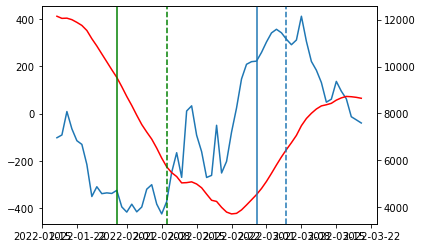

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(data_reg5_y.set_index('date')['slope'])
ax1.plot(data_reg5_y.set_index('date')['slope_cases_roll_avg'])
ax2.plot(data_reg5_y.set_index('date')['cases_roll_avg'], color='red')
#data_reg5_y.set_index('date')['slope'].plot()
#data_reg5_y.set_index('date')['slope'].plot()
plt.axvline(x=reg5_intdate1, color='green')
plt.axvline(x=reg5_intdate1_offset, color='green', linestyle='--')
plt.axvline(x=reg5_intdate2)
plt.axvline(x=reg5_intdate2_offset, linestyle='--')
#data_reg5_X.plot()
#data_reg5_X.set_index('Date')['nomask'].plot()

<AxesSubplot:xlabel='date'>

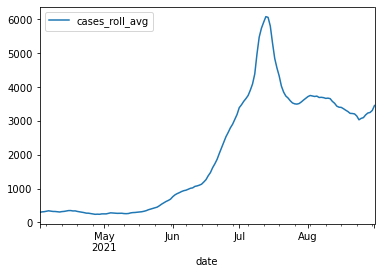

In [11]:
covid_data[(covid_data['date'] > pd.to_datetime('2021-04-01')) & (covid_data['date'] < pd.to_datetime('2021-09-01'))].plot(x='date', y='cases_roll_avg')

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[policy_feature] = X[policy_feature].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

2021-05-17 00:00:00
2021-06-07 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   63
Model:                              GLM   Df Residuals:                       61
Model Family:                  Gaussian   Df Model:                            1
Link Function:                 identity   Scale:                          25564.
Method:                            IRLS   Log-Likelihood:                -408.07
Date:                  Thu, 07 Apr 2022   Deviance:                   1.5594e+06
Time:                          12:12:24   Pearson chi2:                 1.56e+06
No. Iterations:                       3   Pseudo R-squ. (CS):           0.007864
Covariance Type:              nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

AttributeError: 'numpy.float64' object has no attribute 'set_rotation'

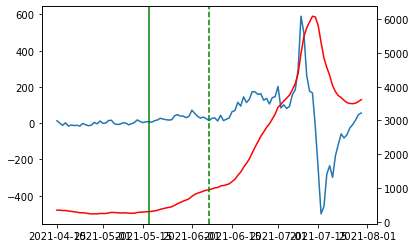

In [30]:
# generic: Impact of reducing mask mandate
def itr(intervention_name, policy_feature, level_post, startdate_str, offset, enddate_str = None):
    offset = offset
    startdate = pd.to_datetime(startdate_str)
    y = covid_data[covid_data['date'] > startdate]
    X = policy_data[policy_data['RegionName'] == 'England']
    X.loc[X[policy_feature] == level_post, intervention_name] = 1
    X[policy_feature] = X[policy_feature].fillna(0)
    #X[intervention_name] = X[intervention_name].shift(offset)
    X['Date'] = pd.to_datetime(X['Date'], format='%Y%m%d')
    X = X[X['Date'] > startdate]
    intdate = X[X[intervention_name] == 1]['Date'].sort_values().iloc[0]
    intdate_offset = intdate + datetime.timedelta(days=offset)
    X = X[X['Date'] < startdate + 2 * (intdate_offset-startdate)]
    y = y[y['date'] < startdate + 2 * (intdate_offset-startdate)]
    X['T'] = (X['Date'] - intdate).dt.days - offset
    data_reg2 = pd.merge(y, X, left_on='date', right_on='Date')
    reg2 = smf.glm(formula=f'slope_cases_roll_avg ~ T*{intervention_name}', data=data_reg2)
    res_reg2 = reg2.fit()
    print(intdate)
    print(intdate_offset)
    print(res_reg2.summary())

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(y.set_index('date')['slope_cases_roll_avg'])
    ax2.plot(y.set_index('date')['cases_roll_avg'], color='red')
    plt.axvline(x=intdate, color='green')
    plt.axvline(x=intdate_offset, linestyle='--', color='green')
    plt.draw()
    for tick in ax1.get_xticks():
        tick.set_rotation(45)

itr('eventscancelrecom', 'C3_Cancel public events', 1, '2021-04-14', 21)

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[policy_feature] = X[policy_feature].fillna(0)
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_33944/231746337.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

2021-07-19 00:00:00
2021-08-02 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   49
Model:                              GLM   Df Residuals:                       47
Model Family:                  Gaussian   Df Model:                            1
Link Function:                 identity   Scale:                          6036.3
Method:                            IRLS   Log-Likelihood:                -281.60
Date:                  Thu, 07 Apr 2022   Deviance:                   2.8150e+05
Time:                          12:15:09   Pearson chi2:                 2.81e+05
No. Iterations:                       3   Pseudo R-squ. (CS):            0.06277
Covariance Type:              nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

AttributeError: 'numpy.float64' object has no attribute 'set_rotation'

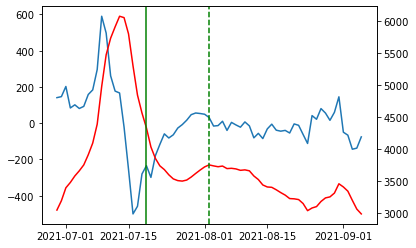

In [31]:
itr('maskingdelta', 'H6_Facial Coverings', 2, '2021-06-28', 14)